In [2]:
#Polynomial Linear Regression
#y = a + bx + cx^2 + ... + ... + nx^n

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('data/Position_Salaries.csv')
dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
dataset = dataset.drop(['Position'], axis = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


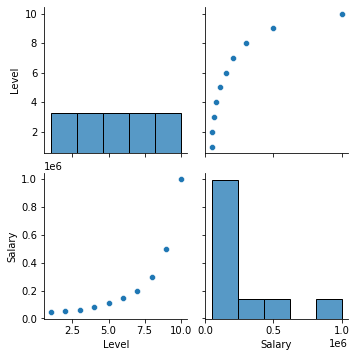

In [7]:
sns.pairplot(dataset)

In [8]:
X = dataset.drop(['Salary'], axis = True)
y = dataset['Salary']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 1), (2, 1), (8,), (2,))

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Training Accuracy :", lin_reg.score(X_train, y_train))
print("Testing Accuracy :", lin_reg.score(X_test, y_test))

Training Accuracy : 0.6366049276570868
Testing Accuracy : 0.8451346684575975


In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

In [14]:
print("Training Accuracy :", lin_reg_2.score(X_poly, y_train))
print("Testing Accuracy :", lin_reg_2.score(X_poly_test, y_test))

Training Accuracy : 0.9995857211026754
Testing Accuracy : 0.9714666803841844


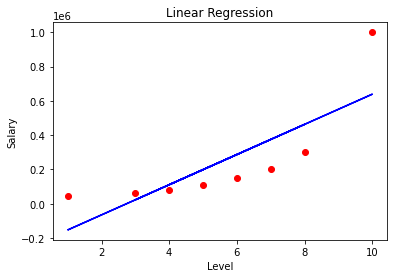

In [15]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

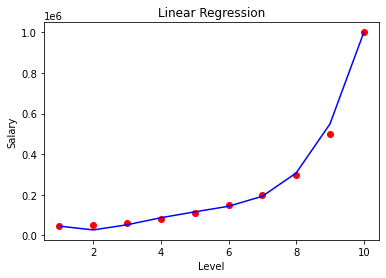

In [16]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [17]:
#Multiple Linear Regression
#y = b0 + b1*x1 + b2*x2 + .... + bn*xn

In [18]:
dataset = pd.read_csv('data/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
dataset = dataset.drop('State', axis = True)

In [20]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

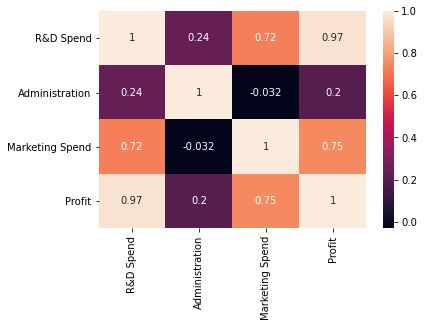

In [21]:
corr = dataset.corr()
sns.heatmap(corr, annot = True)

In [22]:
X = dataset.drop('Profit', axis = True)
y = dataset['Profit']

In [23]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 3), (10, 3), (40,), (10,))

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test).round(1)

In [29]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Original Profit", "Predicted Profit"])
hesaplama.head()

,Original Profit,Predicted Profit
0,103282.38,103901.9
1,144259.40,132763.1
2,146121.95,133567.9
3,77798.83,72911.8
4,191050.39,179627.9


In [30]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.9499572530324031
Testing Accuracy : 0.9393955917820571


In [31]:
regressor.intercept_

111297.71256204927

In [32]:
regressor.coef_

array([35391.2501208 ,   815.21987542,  4202.06618916])

In [33]:
feature = [165349.20, 136897.80, 471784.10]
scale_feature = sc.transform([feature])
scale_feature

array([[2.01641149, 0.56075291, 2.15394309]])

In [34]:
y_pred_test = regressor.predict(scale_feature)
y_pred_test

array([192169.18440985])

In [35]:
#35391 * 2.01 + 815 * 0.56 + 4202 * 2.15 + 111297 = ?????????????????????????

In [36]:
#Gradient Descent (Aşamalı Azaltma, Gradyan İniş) Optimizasyon Algoritması
"""
1- Batch GD : Tüm eğitim örneklerinin her iterasyonda işlenmesi. Yavaş
2- Stochastic GD : Her iterasyonda yalnızca 1 adet eğitim örneği işlenir. Hızlı  
3- Mini Batch GD : Her ikisinden de hızlı. 
"""

In [37]:
plt.rcParams['figure.figsize'] = (10,5)

In [38]:
cols = ['a', 'b']
data = pd.read_csv('data/data.csv', header = None, names = cols)

In [39]:
data.head()

,a,b
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [40]:
x = data.drop('b', axis = 1)
y = data['b']

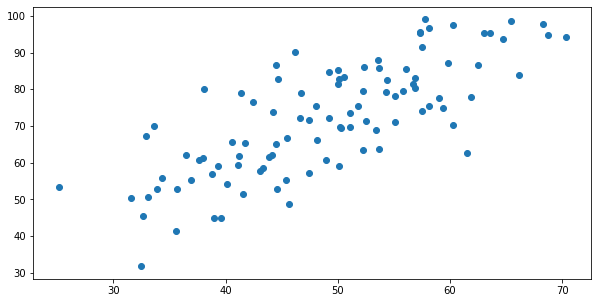

In [41]:
plt.scatter(x, y)
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [43]:
y_pred_lr = lr.predict(x)

In [44]:
print("Intercept : ", lr.intercept_)
print("Coefficient : ", lr.coef_[0])

Intercept :  13.642154681481571
Coefficient :  1.1927057602312432


In [45]:
#Gradyan İniş Kullanırsa:

In [46]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

In [48]:
m = 0
c = 0

L = 0.0001 #learning rate
epochs = 1000

n = float(len(X))

for i in range(epochs):
    Y_pred = m*X + c #Y'nin mevcut tahmin edilen değeri
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum(Y - Y_pred)
    m = m - L * D_m
    c = c - L * D_c
    
print("Intercept : ", m)
print("Coefficient : ", c)

Intercept :  1.4582620978635645
Coefficient :  0.13106568099591231


In [49]:
Y_pred = m*X + c

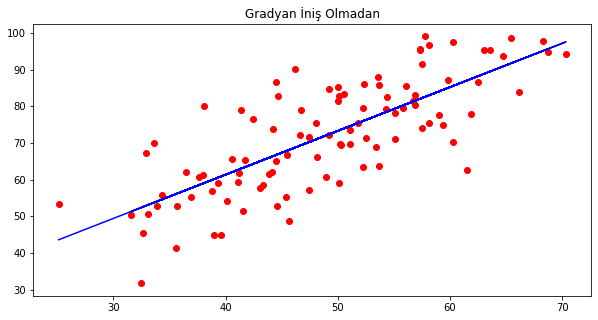

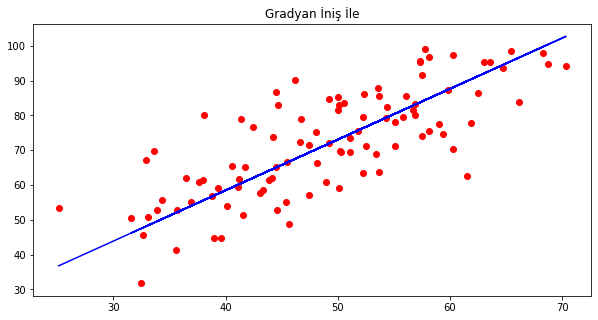

In [50]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lr.predict(x), color = 'blue')
plt.title("Gradyan İniş Olmadan")
plt.show()

plt.scatter(X, Y, color = 'red')
plt.plot(X, Y_pred, color = 'blue')
plt.title("Gradyan İniş İle")
plt.show()

In [51]:
#Logistic Regression

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [54]:
X = dataset.drop(['Purchased', 'User ID', 'Gender'], axis = 1)
y = dataset['Purchased']

In [55]:
X.shape, y.shape

((400, 2), (400,))

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 1.0)
classifier.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = classifier.predict(X_test)

In [60]:
hesaplama = pd.DataFrame(np.c_[y_test, y_pred], columns = ["Original Purchased", "Predicted Purchased"])
hesaplama

,Original Purchased,Predicted Purchased
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


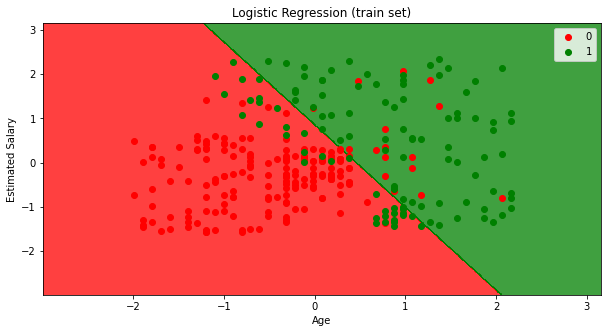

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


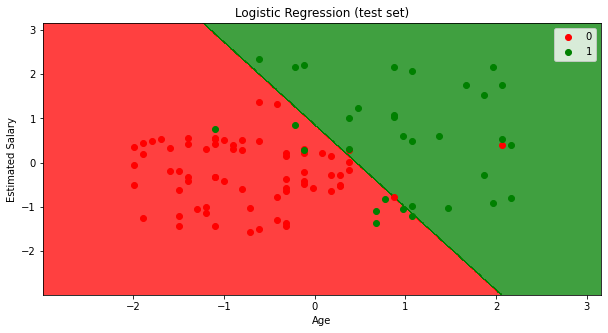

In [62]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Logistic Regression (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#Sınıflandırmada kullanılan değerlendirme metrikleri
"""
1- Confusion Matrix
2- Accuracy
3- Precision
4- Recall
5- Specifity
6- F1-score
7- ROC and AUC
"""